<a href="https://colab.research.google.com/github/Karnikasri/Handwriiten_Character_Recognition/blob/main/Handwriitten_Character_Recognition_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

In [115]:
# Load Dataset
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

# Split features and labels
X = data.drop('0', axis=1)
y = data['0']

# Train-test split and reshaping
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

# Character Dictionary
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',
             10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',
             18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

# Normalize the data
train_x = train_x / 255.0
test_x = test_x / 255.0

# Reshape for CNN input
train_X = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_X = test_x.reshape(test_x.shape[0], 28, 28, 1)


# One-hot encoding labels
train_yOHE = to_categorical(train_y, num_classes=26)
test_yOHE = to_categorical(test_y, num_classes=26)


In [122]:
# CNN Model
model = Sequential()
from keras.layers import Input
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='valid'))
# Removed the problematic MaxPool2D layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [123]:
# Compile and Train
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(train_X, train_yOHE, epochs=1, validation_data=(test_X, test_yOHE),
                    callbacks=[reduce_lr, early_stop])

# Save model
model.save('model_hand.h5')


5287/5287 ━━━━━━━━━━━━━━━━━━━━ 122s 23ms/step - accuracy: 0.5068 - loss: nan - val_accuracy: 0.0656 - val_loss: nan - learning_rate: 0.0010


In [124]:
# Evaluation Metrics
print("Validation Accuracy:", history.history['val_accuracy'])
print("Training Accuracy:", history.history['accuracy'])
print("Validation Loss:", history.history['val_loss'])
print("Training Loss:", history.history['loss'])

Validation Accuracy: [0.0656357854604721]
Training Accuracy: [0.26093536615371704]
Validation Loss: [nan]
Training Loss: [nan]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


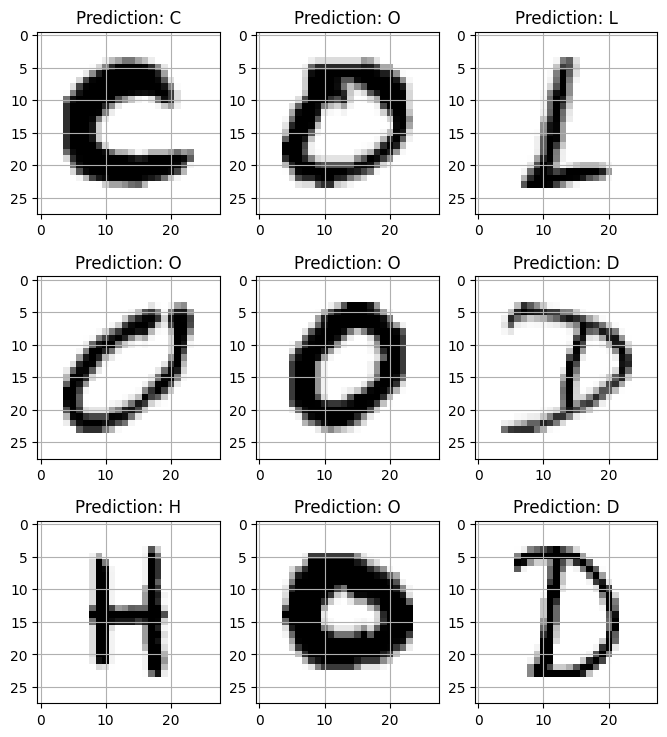

In [125]:
# Predicting on test samples
pred = model.predict(test_X[:9])

# Display predictions
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()
for i, ax in enumerate(axes):
    img = np.reshape(test_X[i], (28, 28))
    ax.imshow(img, cmap="Greys")
    pred_label = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: " + pred_label)
    ax.grid()
plt.show()